# Imports

In [1]:
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle

# Data

In [2]:
fried = pd.read_csv('./data/max-fried.csv')
fried.drop(columns = ['Unnamed: 0'], inplace = True)

# Font Dictionary
font_title = {
    'size': 12,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(fried.shape)
fried.head()

(2558, 89)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,pitch_count,plate_-x,pfx_-x,swing_miss
0,FF,2021-09-29,95.2,1.29,6.11,"Fried, Max",544369,608331,out,hit_into_play,5,Didi Gregorius pops out to third baseman Austi...,R,L,L,ATL,PHI,X,5.0,popup,1,1,2021,0.11,14.40,-0.19,2.30,NaN,NaN,NaN,2,7,Top,95.45,160.60,518595,-4.186734,-138.493824,-7.099702,2.375019,30.306117,-15.310607,3.49,1.60,127.0,89.2,69.0,95.9,2109,6.7,632306,608331,518595,518692,645277,663586,621020,592696,594807,624585,53.81,0.009,0.009,0.0,1.0,0.0,0.0,3.0,52,3,4-Seam Fastball,3,2,2,3,2,3,2,3,Standard,Standard,159,0.020,-0.099,1,1-1,0.19,-1.32,0
1,SL,2021-09-29,82.9,1.86,5.87,"Fried, Max",544369,608331,NaN,ball,13,Didi Gregorius pops out to third baseman Austi...,R,L,L,ATL,PHI,B,NaN,NaN,0,1,2021,-0.34,-1.92,-1.13,1.67,NaN,NaN,NaN,2,7,Top,NaN,NaN,518595,-6.190763,-120.574782,-2.771056,-1.998025,24.639602,-33.409263,3.49,1.60,NaN,NaN,NaN,82.7,2171,6.3,632306,608331,518595,518692,645277,663586,621020,592696,594807,624585,54.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,2,Slider,3,2,2,3,2,3,2,3,Standard,Standard,295,0.000,0.014,0,0-1,1.13,4.08,0
2,SL,2021-09-29,86.7,1.65,5.93,"Fried, Max",544369,608331,NaN,called_strike,2,Didi Gregorius pops out to third baseman Austi...,R,L,L,ATL,PHI,S,NaN,NaN,0,0,2021,-0.35,-4.32,-0.26,3.28,NaN,NaN,NaN,2,7,Top,NaN,NaN,518595,-3.844511,-126.288617,0.569788,-2.988297,25.288069,-36.362246,3.49,1.63,NaN,NaN,NaN,86.8,2464,6.2,632306,608331,518595,518692,645277,663586,621020,592696,594807,624585,54.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,1,Slider,3,2,2,3,2,3,2,3,Standard,Standard,287,0.000,-0.018,1,0-0,0.26,4.20,0
3,SL,2021-09-29,85.3,1.68,5.91,"Fried, Max",663837,608331,out,hit_into_play,8,"Matt Vierling grounds out sharply, shortstop D...",R,R,L,ATL,PHI,X,6.0,ground_ball,1,2,2021,-0.09,-4.20,-0.06,1.66,NaN,NaN,NaN,1,7,Top,111.05,163.34,518595,-3.922249,-124.279030,-3.036532,-0.161456,24.331685,-35.432809,3.49,1.60,18.0,108.9,-5.0,85.6,2451,6.3,632306,608331,518595,518692,645277,663586,621020,592696,594807,624585,54.15,0.449,0.428,0.0,1.0,0.0,0.0,2.0,51,4,Slider,3,2,2,3,2,3,2,3,Standard,Standard,288,0.031,-0.114,1,1-2,0.06,1.08,0
4,CH,2021-09-29,87.4,1.93,5.66,"Fried, Max",663837,608331,NaN,ball,14,"Matt Vierling grounds out sharply, shortstop D...",R,R,L,ATL,PHI,B,NaN,NaN,0,2,2021,1.17,4.80,1.98,0.55,NaN,NaN,NaN,1,7,Top,NaN,NaN,518595,-2.317153,-127.171078,-6.991725,13.196216,27.240141,-26.572564,3.54,1.70,NaN,NaN,NaN,87.6,1267,6.5,632306,608331,518595,518692,645277,663586,621020,592696,594807,624585,53.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,3,Changeup,3,2,2,3,2,3,2,3,Standard,Standard,130,0.000,0.013,0,0-2,-1.98,-14.04,0


In [3]:
fried.groupby(['pitch_type']).mean()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,plate_-x,pfx_-x,swing_miss
pitch_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CH,84.703636,1.732727,5.720182,589661.763636,608331.0,10.945455,5.500000,0.872727,0.890909,2021.0,0.987455,5.476364,0.764545,2.062182,NaN,500743.000000,548366.875000,1.072727,4.454545,143.064000,131.686000,563978.309091,-4.249016,-123.310717,-3.165311,10.943506,23.542031,-27.134543,3.412364,1.591455,150.615385,78.523077,25.230769,85.214545,1411.454545,6.507273,633020.418182,608331.0,563978.309091,529229.745455,642659.290909,639981.200000,621020.0,573286.127273,606439.618182,622694.527273,53.993636,0.287400,0.263800,0.150000,1.000000,0.166667,0.000000,3.000000,32.618182,2.818182,1.654545,1.800000,0.690909,2.763636,1.800000,1.654545,0.690909,2.763636,133.472727,0.000200,-0.016345,0.472727,-0.764545,-11.849455,0.072727
CU,74.435008,1.352374,6.125738,592999.922374,608331.0,9.636225,4.181208,0.709285,1.006088,2021.0,-0.690883,-15.423379,-0.058706,1.840152,592795.620000,589249.323810,590962.213930,0.981735,3.656012,119.156988,130.479759,570769.750381,-1.687475,-108.309275,0.731424,-5.069970,20.792939,-42.601278,3.340761,1.554170,105.466667,77.391975,2.944444,73.992998,2649.863014,6.185084,633238.797565,608331.0,570769.750381,525308.164384,638921.983257,647777.610350,621020.0,561539.471842,612570.097412,632307.432268,54.316530,0.298012,0.322470,0.200318,1.000000,0.146497,0.089172,2.879518,26.864536,2.910198,1.514460,1.327245,0.902588,1.939117,1.339422,1.520548,0.920852,1.939117,332.127854,-0.000009,-0.012335,0.604262,0.058706,8.290594,0.132420
FF,93.953253,1.186396,6.123754,595831.829830,608331.0,7.507508,5.080460,0.895896,0.821822,2021.0,0.112362,12.716757,-0.300340,2.722643,609927.169492,582707.352941,586599.840909,0.924925,3.335335,119.231184,133.077193,569395.095095,-4.106438,-136.771920,-5.492239,2.261838,28.063143,-17.851428,3.394214,1.583343,137.883951,82.049377,10.344140,94.355656,2114.161161,6.400501,633246.577578,608331.0,569395.095095,524493.561562,640088.747748,645392.110110,621020.0,560078.830831,613833.430430,633299.635636,54.099169,0.319504,0.335882,0.316949,0.989831,0.210169,0.122034,2.859649,23.968969,2.855856,1.363363,1.204204,0.815816,1.751752,1.214214,1.377377,0.839840,1.751752,161.765766,0.000467,-0.009431,0.706707,0.300340,-1.348348,0.077077
SI,93.461168,1.190378,6.080859,599929.508591,608331.0,9.020619,4.897059,0.814433,0.701031,2021.0,0.880069,10.478351,0.436667,2.199278,597797.250000,580420.103448,609012.512195,0.993127,3.532646,124.301000,130.027000,586224.924399,-3.891793,-135.988433,-6.198223,11.769502,29.255320,-20.182174,3.380172,1.579278,123.587719,83.175676,6.351351,93.741581,1996.914089,6.417869,633302.587629,608331.0,586224.924399,525164.927835,641318.951890,646855.793814,621020.0,558717.900344,612394.780069,634979.350515,54.083436,0.291667,0.322233,0.344667,1.000000,0.213333,0.186667,2.816667,25.704467,2.584192,1.237113,1.446735,0.752577,1.931271,1.474227,1.247423,0.790378,1.931271,161.993127,-0.002302,0.007402,0.666667,-0.436667,-10.560825,0.096220
SL,84.691367,1.509101,5.972212,595161.012590,608331.0,8.859712,4.916667,0.818345,0.985612,2021.0,-0.745791,0.193165,-0.536709,2.148921,592121.200000,589755.104762,583623.617143,0.992806,3.615108,117.663294,121.590941,570211

In [4]:
ff = fried.loc[fried['pitch_type'] == 'FF']
cu = fried.loc[fried['pitch_type'] == 'CU']
sl = fried.loc[fried['pitch_type'] == 'SL']
si = fried.loc[fried['pitch_type'] == 'SI']
ch = fried.loc[fried['pitch_type'] == 'CH']

r_ff = fried.loc[(fried['pitch_type'] == 'FF') & (fried['stand'] == 'R')]
r_cu = fried.loc[(fried['pitch_type'] == 'CU') & (fried['stand'] == 'R')]
r_sl = fried.loc[(fried['pitch_type'] == 'SL') & (fried['stand'] == 'R')]
r_si = fried.loc[(fried['pitch_type'] == 'SI') & (fried['stand'] == 'R')]
r_ch = fried.loc[(fried['pitch_type'] == 'CH') & (fried['stand'] == 'R')]

l_ff = fried.loc[(fried['pitch_type'] == 'FF') & (fried['stand'] == 'L')]
l_cu = fried.loc[(fried['pitch_type'] == 'CU') & (fried['stand'] == 'L')]
l_sl = fried.loc[(fried['pitch_type'] == 'SL') & (fried['stand'] == 'L')]
l_si = fried.loc[(fried['pitch_type'] == 'SI') & (fried['stand'] == 'L')]
l_ch = fried.loc[(fried['pitch_type'] == 'CH') & (fried['stand'] == 'L')]

# Pitcher Overview

### Distribution of Pitch Types

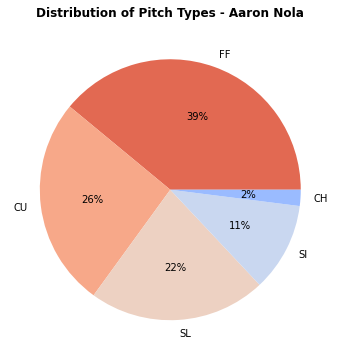

In [5]:
plt.figure(figsize = (8, 6))

dist = round(fried.pitch_type.value_counts(normalize = True), 2)
labels = ['FF', 'CU', 'SL', 'SI', 'CH']
color = sns.color_palette('coolwarm_r')

plt.pie(dist, labels = labels, colors = color, autopct = '%.0f%%')
plt.title('Distribution of Pitch Types - Aaron Nola', fontdict = font_title, pad = 15);

### Velocity by Pitch Type

FF velo sits: 93.0 - 95.0 mph,  max: 97.9 mph
CU velo sits: 73.0 - 76.0 mph,  max: 80.9 mph
SL velo sits: 83.0 - 86.0 mph,  max: 91.3 mph
SI velo sits: 92.0 - 95.0 mph,  max: 96.9 mph
CH velo sits: 84.0 - 86.0 mph,  max: 88.6 mph


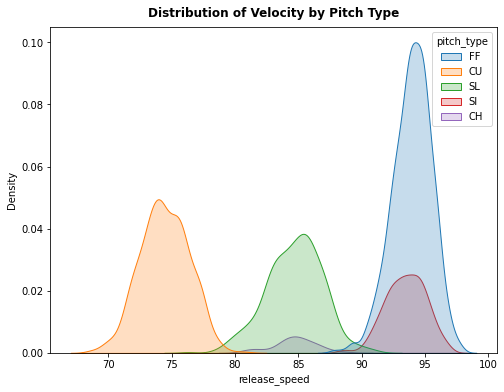

In [6]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = fried, x = 'release_speed', shade = 'fill', 
            multiple = 'layer', hue = 'pitch_type', 
            hue_order = ['FF', 'CU', 'SL', 'SI', 'CH'], 
            palette = 'tab10')
plt.title('Distribution of Velocity by Pitch Type', fontdict = font_title, pad = 15);
print('FF velo sits:', round(ff['release_speed'].quantile(.25)), '-', round(ff['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(ff['release_speed'].max(), 2), 'mph')
print('CU velo sits:', round(cu['release_speed'].quantile(.25)), '-', round(cu['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(cu['release_speed'].max(), 2), 'mph')
print('SL velo sits:', round(sl['release_speed'].quantile(.25)), '-', round(sl['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(sl['release_speed'].max(), 2), 'mph')
print('SI velo sits:', round(si['release_speed'].quantile(.25)), '-', round(si['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(si['release_speed'].max(), 2), 'mph')
print('CH velo sits:', round(ch['release_speed'].quantile(.25)), '-', round(ch['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(ch['release_speed'].max(), 2), 'mph');

### Release Postion

*from hitters' perspective

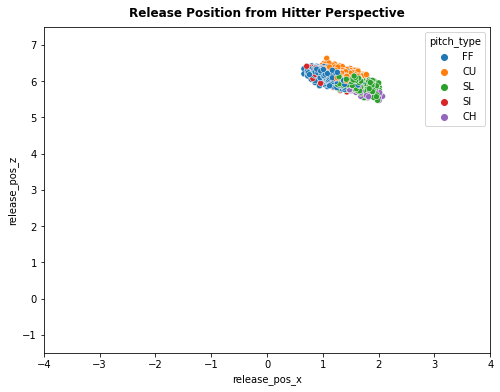

In [7]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = fried, x = 'release_pos_x', y = 'release_pos_z', hue = 'pitch_type', 
                hue_order = ['FF', 'CU', 'SL', 'SI', 'CH'], palette = 'tab10')
plt.xlim(-4, 4)
plt.ylim(-1.5, 7.5)
plt.title('Release Position from Hitter Perspective', fontdict = font_title, pad = 15);

# Pitcher Stuff

### Velocity & Spin Rate

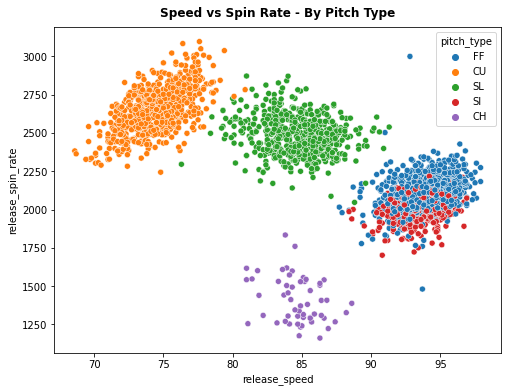

In [8]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = fried, x = 'release_speed', y = 'release_spin_rate', hue = 'pitch_type', 
                hue_order = ['FF', 'CU', 'SL', 'SI', 'CH'], palette = 'tab10')
plt.title('Speed vs Spin Rate - By Pitch Type', fontdict = font_title, pad = 15);

### Horizontal & Vertical Break Axis

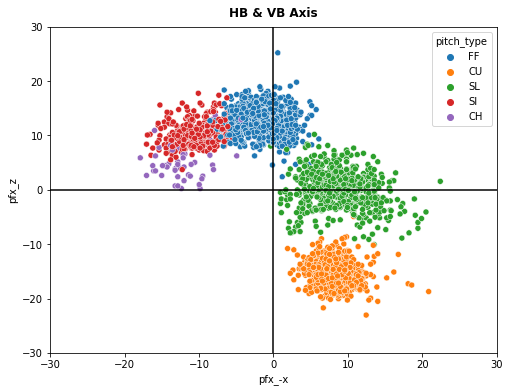

In [9]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = fried, x = 'pfx_-x', y = 'pfx_z', hue = 'pitch_type', 
                hue_order = ['FF', 'CU', 'SL', 'SI', 'CH'], palette = 'tab10')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.title('HB & VB Axis', fontdict = font_title, pad = 15);

# Count Breakdown

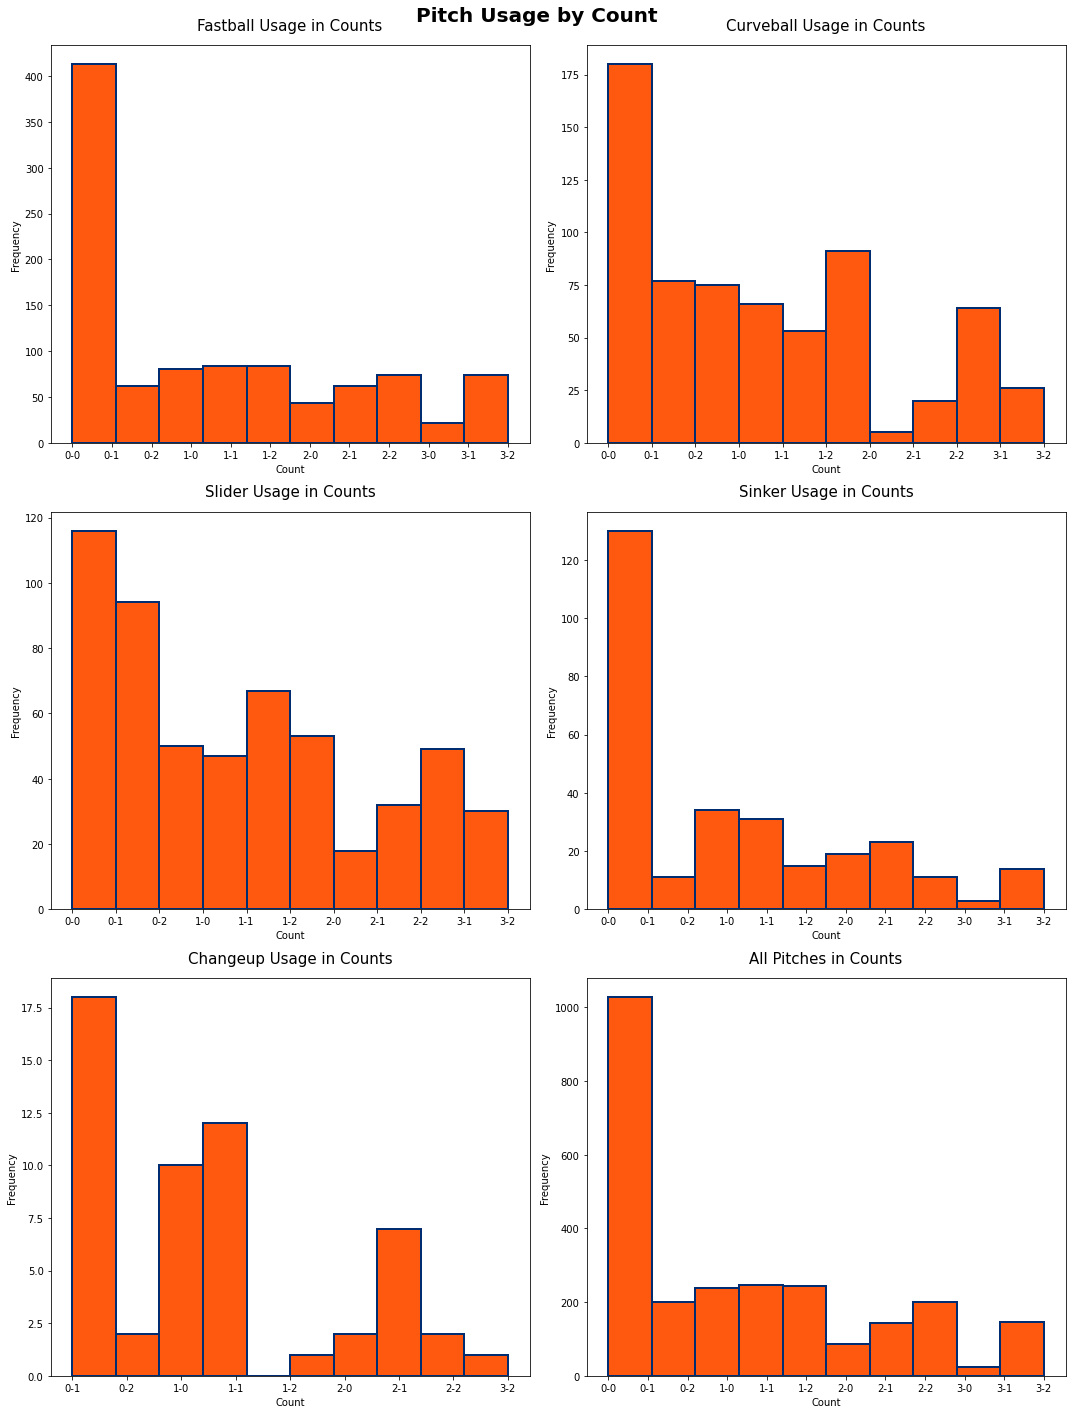

In [10]:
blue = '#002D72'
orange = '#FF5910'
fig, axs = plt.subplots(3, 2, figsize = (15, 20))
fig.suptitle('Pitch Usage by Count', fontsize = 20, fontweight = 'bold')
plt.setp(axs[0:, :], xlabel = 'Count')
plt.setp(axs[:, 0:], ylabel = 'Frequency')
axs[0][0].hist(ff['pitch_count'].sort_values(ascending = True), color = orange, edgecolor = blue, linewidth = 2)
axs[0][0].set_title('Fastball Usage in Counts', fontsize = 15, pad = 15)
axs[0][1].hist(cu['pitch_count'].sort_values(ascending = True), color = orange, edgecolor = blue, linewidth = 2)
axs[0][1].set_title('Curveball Usage in Counts', fontsize = 15, pad = 15)
axs[1][0].hist(sl['pitch_count'].sort_values(ascending = True), color = orange, edgecolor = blue, linewidth = 2)
axs[1][0].set_title('Slider Usage in Counts', fontsize = 15, pad = 15)
axs[1][1].hist(si['pitch_count'].sort_values(ascending = True), color = orange, edgecolor = blue, linewidth = 2)
axs[1][1].set_title('Sinker Usage in Counts', fontsize = 15, pad = 15)
axs[2][0].hist(ch['pitch_count'].sort_values(ascending = True), color = orange, edgecolor = blue, linewidth = 2)
axs[2][0].set_title('Changeup Usage in Counts', fontsize = 15, pad = 15)
axs[2][1].hist(fried['pitch_count'].sort_values(ascending = True), color = orange, edgecolor = blue, 
               linewidth = 2)
axs[2][1].set_title('All Pitches in Counts', fontsize = 15, pad = 15)
plt.tight_layout();

# Pitch Locations

### Balls and Strikes 

*from Hitters' Perspective

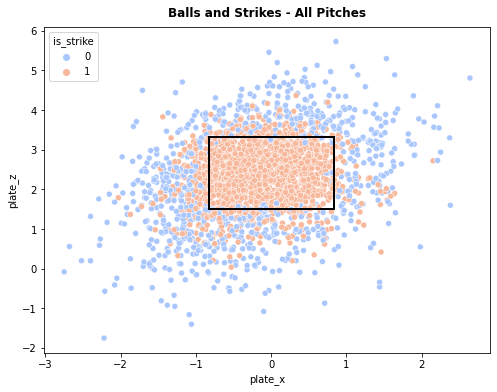

In [11]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = fried, x = 'plate_x', y = 'plate_z', hue = 'is_strike', palette = 'coolwarm')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);

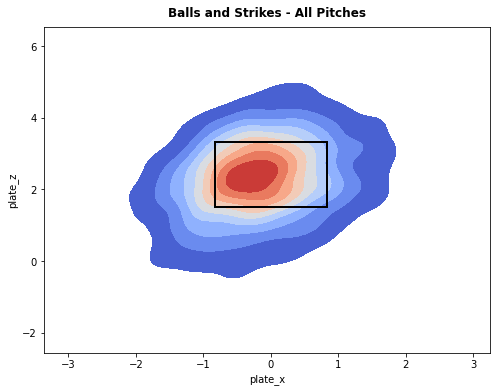

In [12]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = fried, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);

### Fastball Heatmaps

*All heatmaps are from hitters' perspective

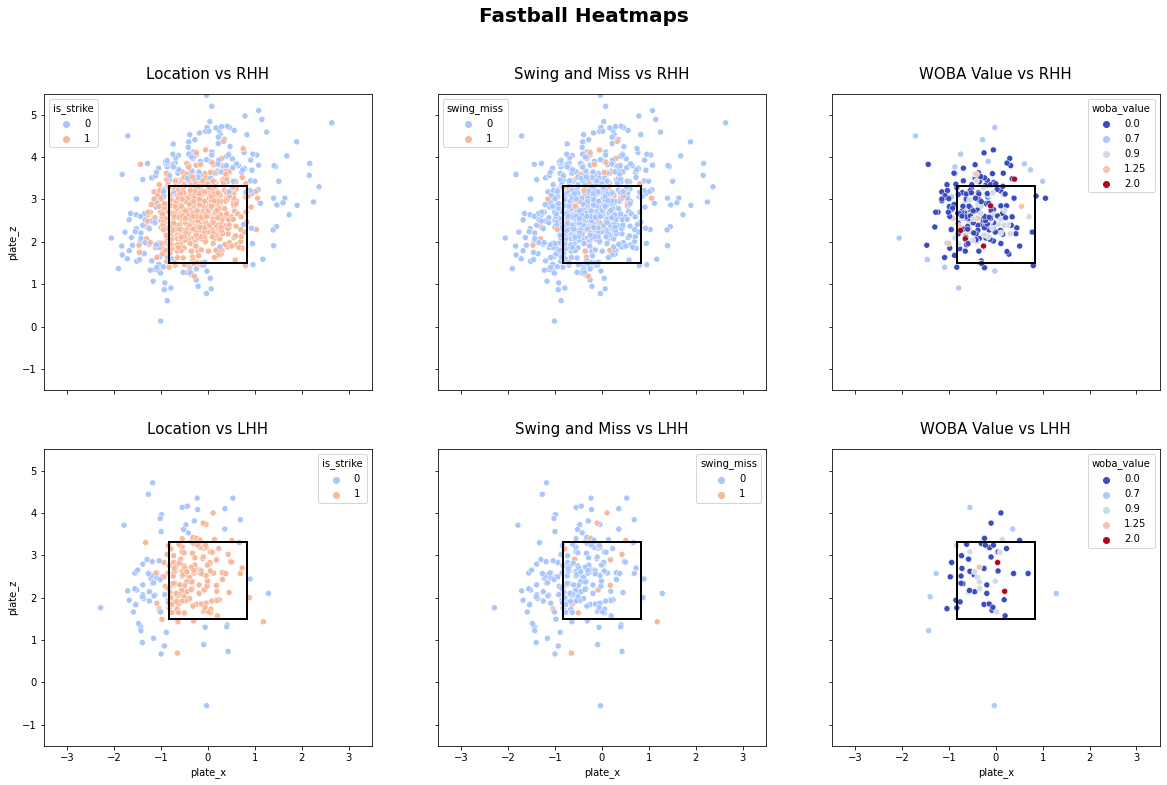

In [13]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Fastball Heatmaps', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);

### Curveball Heatmaps

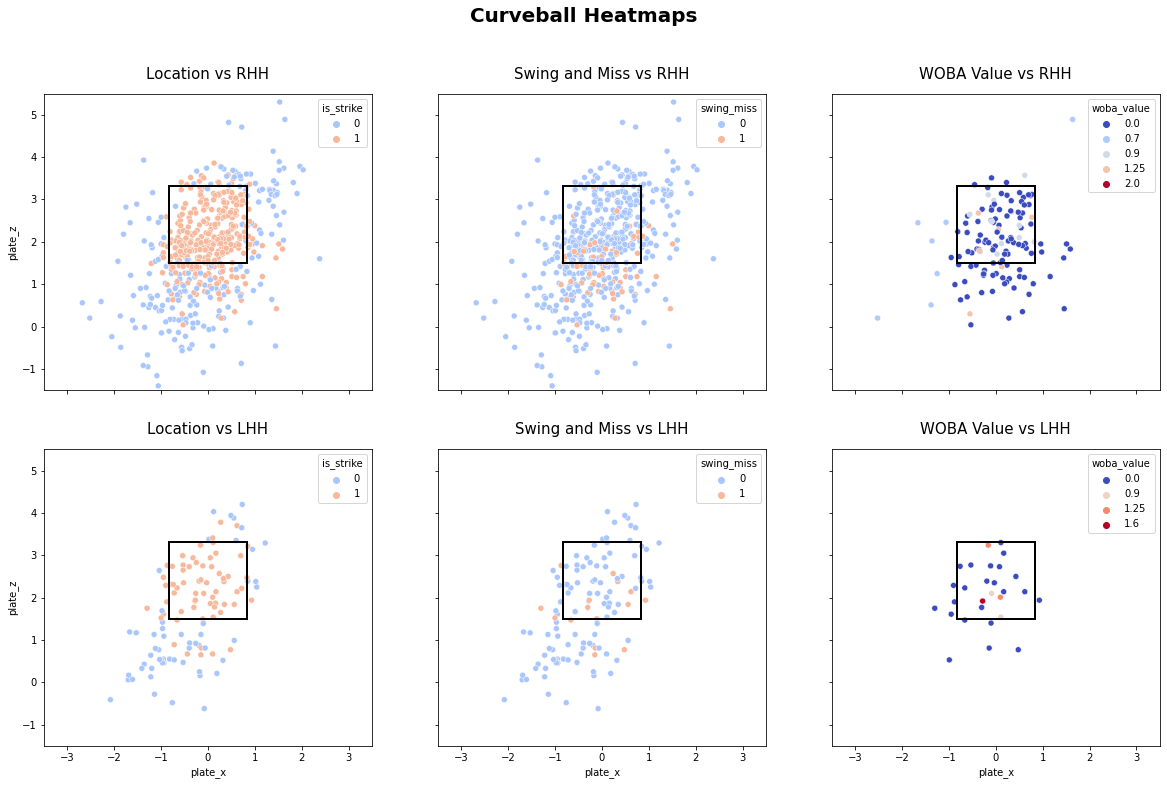

In [14]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Curveball Heatmaps', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);

### Slider Heatmaps

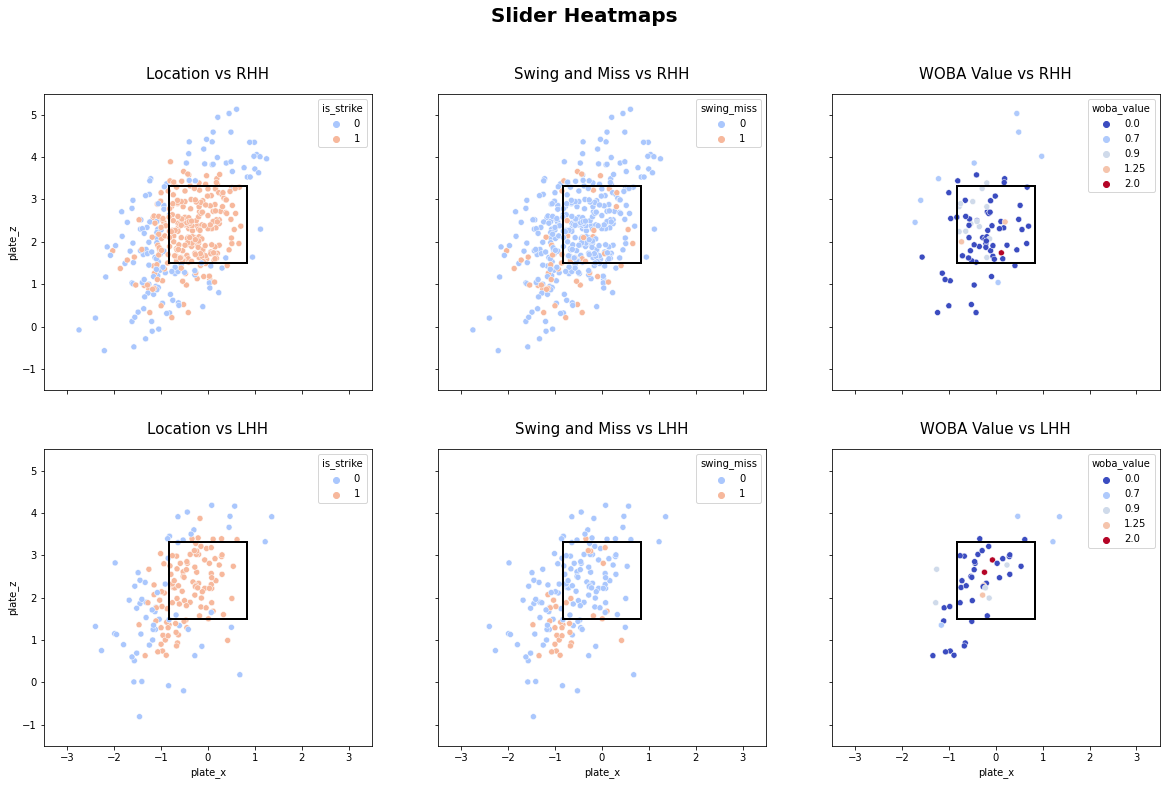

In [15]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Slider Heatmaps', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);

### Sinker Heatmaps

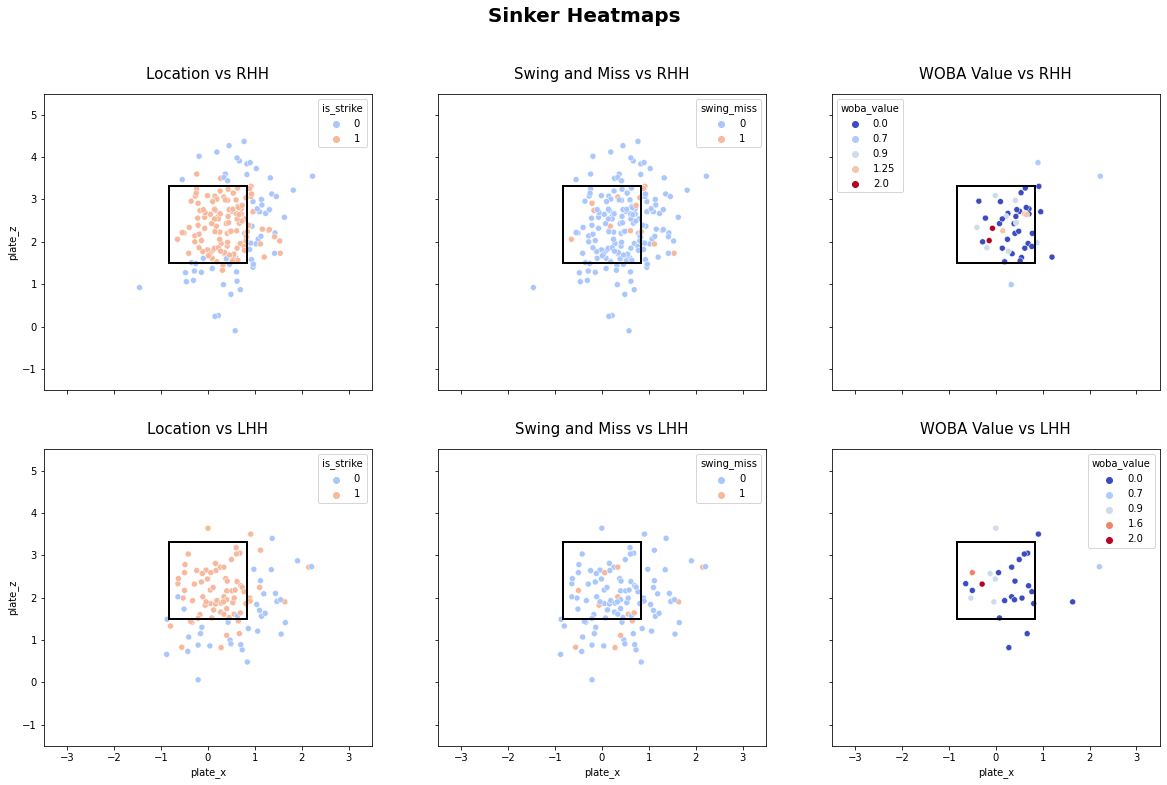

In [16]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Sinker Heatmaps', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);

### Changeup Heatmaps

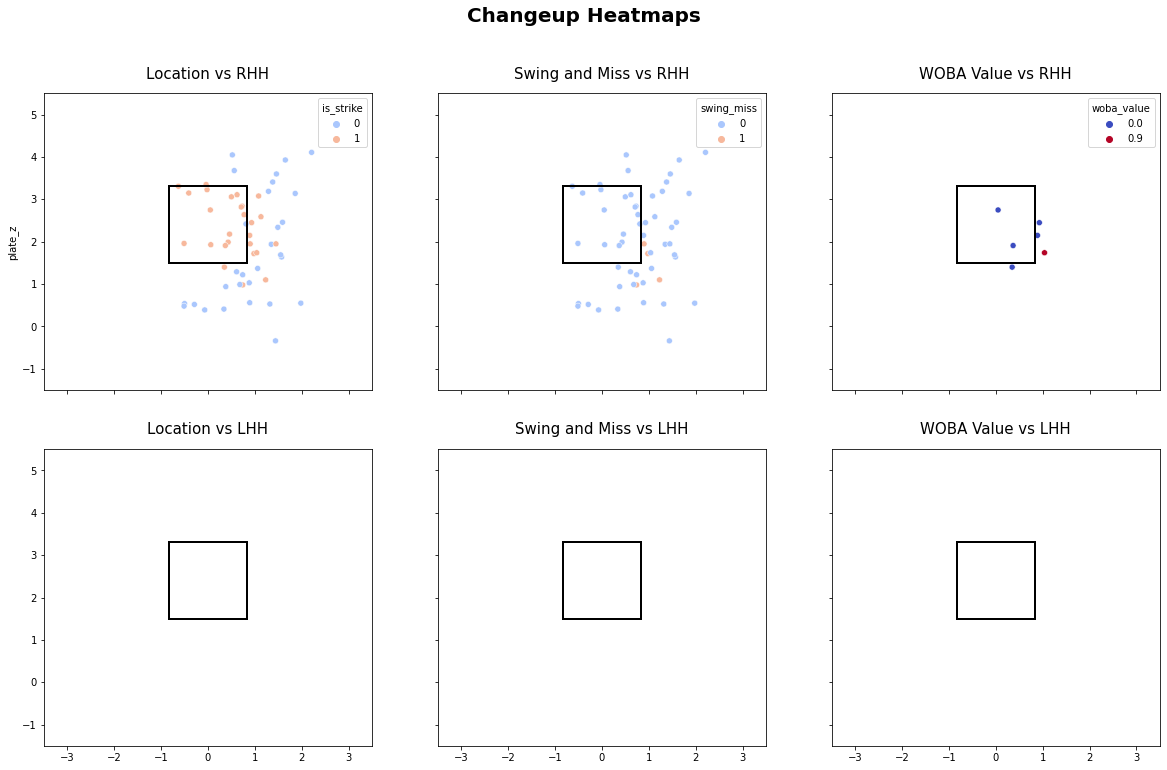

In [17]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Changeup Heatmaps', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);